First 5 rows of the dataset:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  

Statistical summary:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50% 

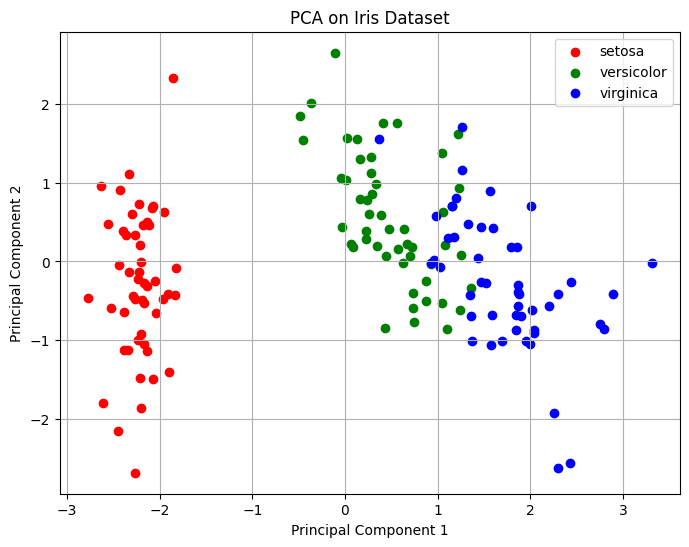

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

iris_data = load_iris()
features = iris_data.data
target = iris_data.target

iris_df = pd.DataFrame(features, columns=iris_data.feature_names)
iris_df['species'] = target

print("First 5 rows of the dataset:\n", iris_df.head())
print("\nStatistical summary:\n", iris_df.describe())

scaler_model = StandardScaler()
features_scaled = scaler_model.fit_transform(features)

cov_matrix_new = np.cov(features_scaled.T)
print("\nCovariance Matrix:\n", cov_matrix_new)

eig_vals, eig_vecs = np.linalg.eig(cov_matrix_new)

print("\nEigenvalues:\n", eig_vals)
print("\nEigenvectors:\n", eig_vecs)

eig_pairs = [(eig_vals[i], eig_vecs[:, i]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)

projection_matrix = np.hstack((eig_pairs[0][1].reshape(4, 1), eig_pairs[1][1].reshape(4, 1)))
pca_transformed = features_scaled.dot(projection_matrix)

plt.figure(figsize=(8, 6))
color_map = ['r', 'g', 'b']
for idx, color in zip([0, 1, 2], color_map):
    plt.scatter(pca_transformed[target == idx, 0], pca_transformed[target == idx, 1], color=color, label=iris_data.target_names[idx])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA on Iris Dataset')
plt.grid()
plt.show()
